Problem Statement

Write a Python program to draw a 3D plot that visualizes the regression model for house price prediction using suitable Python-based 3D plotting libraries.

Assume the following features were used:

1. Area (sq ft)
2. Number of Bedrooms
3. House Price

Fitted Regression Model:
Price = 20.121 + (0.02893)*Area + (8.314)*Bedrooms


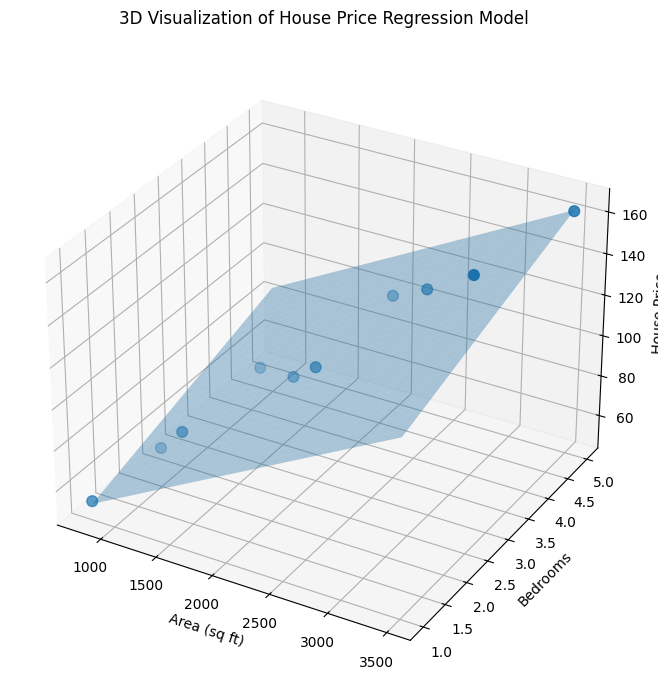

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# -------------------------
# 1) Sample data assumed for visualization.
# -------------------------
area = np.array([800, 1000, 1200, 1500, 1800, 2000, 2300, 2600, 3000, 3500], dtype=float)
bedrooms = np.array([1, 2, 2, 3, 3, 3, 4, 4, 4, 5], dtype=float)

# A realistic-ish price pattern (in lakhs) + small noise
rng = np.random.default_rng(42)
price = 20 + 0.03 * area + 8 * bedrooms + rng.normal(0, 3, size=len(area))  # price in lakhs

# X matrix for regression: [Area, Bedrooms]
X = np.column_stack([area, bedrooms])
y = price

# -------------------------
# 2) Fit Linear Regression
# -------------------------
model = LinearRegression()
model.fit(X, y)

b0 = model.intercept_
b1, b2 = model.coef_

print("Fitted Regression Model:")
print(f"Price = {b0:.3f} + ({b1:.5f})*Area + ({b2:.3f})*Bedrooms")

# -------------------------
# 3) Create grid for regression plane
# -------------------------
area_grid = np.linspace(area.min(), area.max(), 30)
bed_grid = np.linspace(bedrooms.min(), bedrooms.max(), 30)
A, B = np.meshgrid(area_grid, bed_grid)

# Predict price on the grid
grid_points = np.column_stack([A.ravel(), B.ravel()])
P = model.predict(grid_points).reshape(A.shape)

# -------------------------
# 4) Plot 3D scatter + regression plane
# -------------------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter: actual data points
ax.scatter(area, bedrooms, price, s=60)

# Surface: regression plane
ax.plot_surface(A, B, P, alpha=0.35, rstride=1, cstride=1, linewidth=0)

# Labels and title
ax.set_title("3D Visualization of House Price Regression Model", pad=20)
ax.set_xlabel("Area (sq ft)")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("House Price")

plt.tight_layout()
plt.show()